In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from pickle import dump
import os


In [61]:
file_path = "/Users/xuechendawn/IdeaProjects/robot/SCFP2009panel.xlsx"
dataset = pd.read_excel(file_path)

print(dataset.shape)
print(dataset.head())

(19285, 515)
   YY1  Y1         WGT09  AGE07  AGECL07  EDUC07  EDCL07  MARRIED07  KIDS07  \
0    1  11  11668.134198     47        3      12       2          1       0   
1    1  12  11823.456494     47        3      12       2          1       0   
2    1  13  11913.228354     47        3      12       2          1       0   
3    1  14  11929.394266     47        3      12       2          1       0   
4    1  15  11917.722907     47        3      12       2          1       0   

   LIFECL07  ...  NHMORTPCT  WAGEINCPCT  BUSSEFARMINCPCT  INTDIVINCPCT  \
0         2  ... -21.052632  -32.931828              0.0  15939.278937   
1         2  ... -21.052632  -32.931828              0.0  15939.278937   
2         2  ... -50.000000  -32.931828              0.0  15939.278937   
3         2  ... -33.333333  -32.931828              0.0  15939.278937   
4         2  ... -38.596491  -32.931828              0.0  15939.278937   

   KGINCPCT  SSRETINCPCT  TRANSFOTHINCPCT  PSAVINGPCT  LEVERAGEPCT 

In [62]:
# Asserts
dataset['Risky_Assets_2007'] = dataset['NMMF07']+dataset['STOCKS07']+dataset['BOND07']
dataset['Risky_Assets_2009'] = dataset['NMMF09']+dataset['STOCKS09']+dataset['BOND09']


In [63]:
dataset['Risk_Free_Assets_2007'] = dataset['LIQ07']+dataset['CDS07']+dataset['SAVBND07']+dataset['CASHLI07']
dataset['Risk_Free_Assets_2009'] = dataset['LIQ09']+dataset['CDS09']+dataset['SAVBND09']+dataset['CASHLI09']

In [64]:
sp500_2007 = 1478
sp500_2009 = 948

dataset['Risk_Tolerance_2007'] = (dataset['Risky_Assets_2007'] / (dataset['Risk_Free_Assets_2007']+ dataset['Risky_Assets_2007'])) 
dataset['Risk_Tolerance_2009'] = (dataset['Risky_Assets_2009'] / (dataset['Risky_Assets_2009']+dataset['Risk_Free_Assets_2009'])) * (sp500_2009/sp500_2007)

In [65]:
import copy
dataset2 = copy.deepcopy(dataset)
dataset2.head(n=10)


,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I,Risky_Assets_2007,Risky_Assets_2009,Risk_Free_Assets_2007,Risk_Free_Assets_2009,Risk_Tolerance_2007,Risk_Tolerance_2009
0,1,11,11668.134198,47,3,12,2,1,0,2,...,0.0,93.125197,270.403054,57,0.000000e+00,17000,7994.813847,16000,0.000000,0.330422
1,1,12,11823.456494,47,3,12,2,1,0,2,...,0.0,93.125197,249.593620,57,0.000000e+00,18000,7994.813847,19000,0.000000,0.312036
2,1,13,11913.228354,47,3,12,2,1,0,2,...,0.0,93.125197,209.233358,57,0.000000e+00,12000,7984.457871,13000,0.000000,0.307876
3,1,14,11929.394266,47,3,12,2,1,0,2,...,0.0,93.125197,209.273158,57,0.000000e+00,13000,7984.457871,25000,0.000000,0.219429
4,1,15,11917.722907,47,3,12,2,1,0,2,...,0.0,93.125197,232.690767,57,0.000000e+00,12000,7994.813847,17000,0.000000,0.265410
5,2,21,255.421402,56,4,17,4,1,2,5,...,0.0,-51.718701,131.926121,57,1.387701e+06,350000,337604.833440,230000,0.804322,0.387056
6,2,22,265.151248,56,4,17,4,1,2,5,...,0.0,-51.718701,131.926121,57,1.480905e+06,350000,337604.833440,230000,0.814351,0.387056
7,2,23,254.044527,56,4,17,4,1,2,5,...,0.0,-51.718701,131.926121,57,1.164012e+06,350000,337604.833440,230000,0.775172,0.387056
8,2,24,252.877840,56,4,17,4,1,2,5,...,0.0,-51.718701,131.926121,57,2.489577e+06,350000,337604.833440,230000,0.880586,0.387056
9,2,25,245.023339,56,4,17,4,1,2,5,...,0.0,-51.718701,131.926121,57,1.862005e+06,350000,337604.833440,230000,0.846516,0.387056


In [66]:
dataset2['Risk_Tolerance_Change'] = abs(dataset2['Risk_Tolerance_2009']/dataset2['Risk_Tolerance_2007']-1)*100

In [67]:
print('Null Values = ',dataset2.isnull().values.any())

Null Values =  True


In [68]:
dataset2 = dataset2.dropna()
dataset2 = dataset2[~dataset2.isin([np.nan,np.inf,-np.inf]).any(axis=1)]

In [69]:
print('Null Values = ',dataset2.isnull().values.any())

Null Values =  False


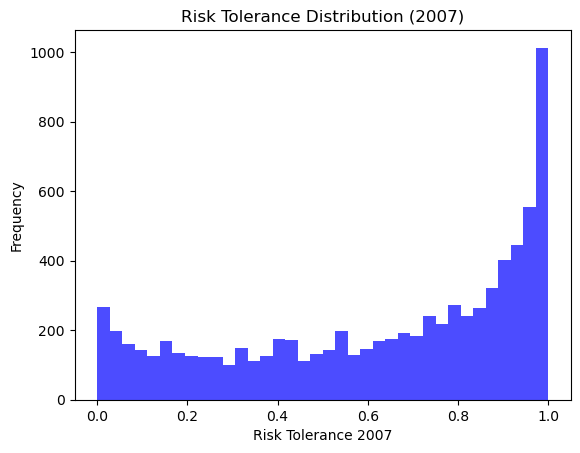

In [70]:
plt.hist(dataset2['Risk_Tolerance_2007'], bins=int(180/5), color='blue', alpha=0.7)
plt.xlabel('Risk Tolerance 2007')
plt.ylabel('Frequency')
plt.title('Risk Tolerance Distribution (2007)')
plt.show()

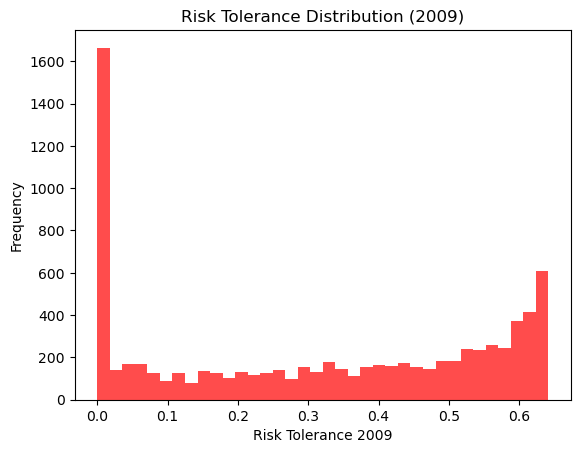

In [71]:
plt.hist(dataset2['Risk_Tolerance_2009'], bins=int(180/5), color='red', alpha=0.7)
plt.xlabel('Risk Tolerance 2009')
plt.ylabel('Frequency')
plt.title('Risk Tolerance Distribution (2009)')
plt.show()

In [79]:
intelligent_investors = dataset2[dataset2['Risk_Tolerance_Change'] < 10]

In [80]:
selected_columns = [
    'AGE07', 'EDCL07', 'MARRIED07', 'KIDS07', 
    'OCCAT107', 'INCOME07','RISK07', 'NETWORTH07',   
    'Risk_Tolerance_2007'
]

In [81]:
selected_dataset = intelligent_investors[selected_columns]
#drop_columns = [col for col in intelligent_investors if col not in selected_columns]
#dataset3=copy.deepcopy(intelligent_investors)
#dataset3.drop(labels=drop_columns,axis=1,inplace = True)

In [82]:
correlation = selected_dataset.corr()

<Axes: title={'center': 'Correlation Matrix'}>

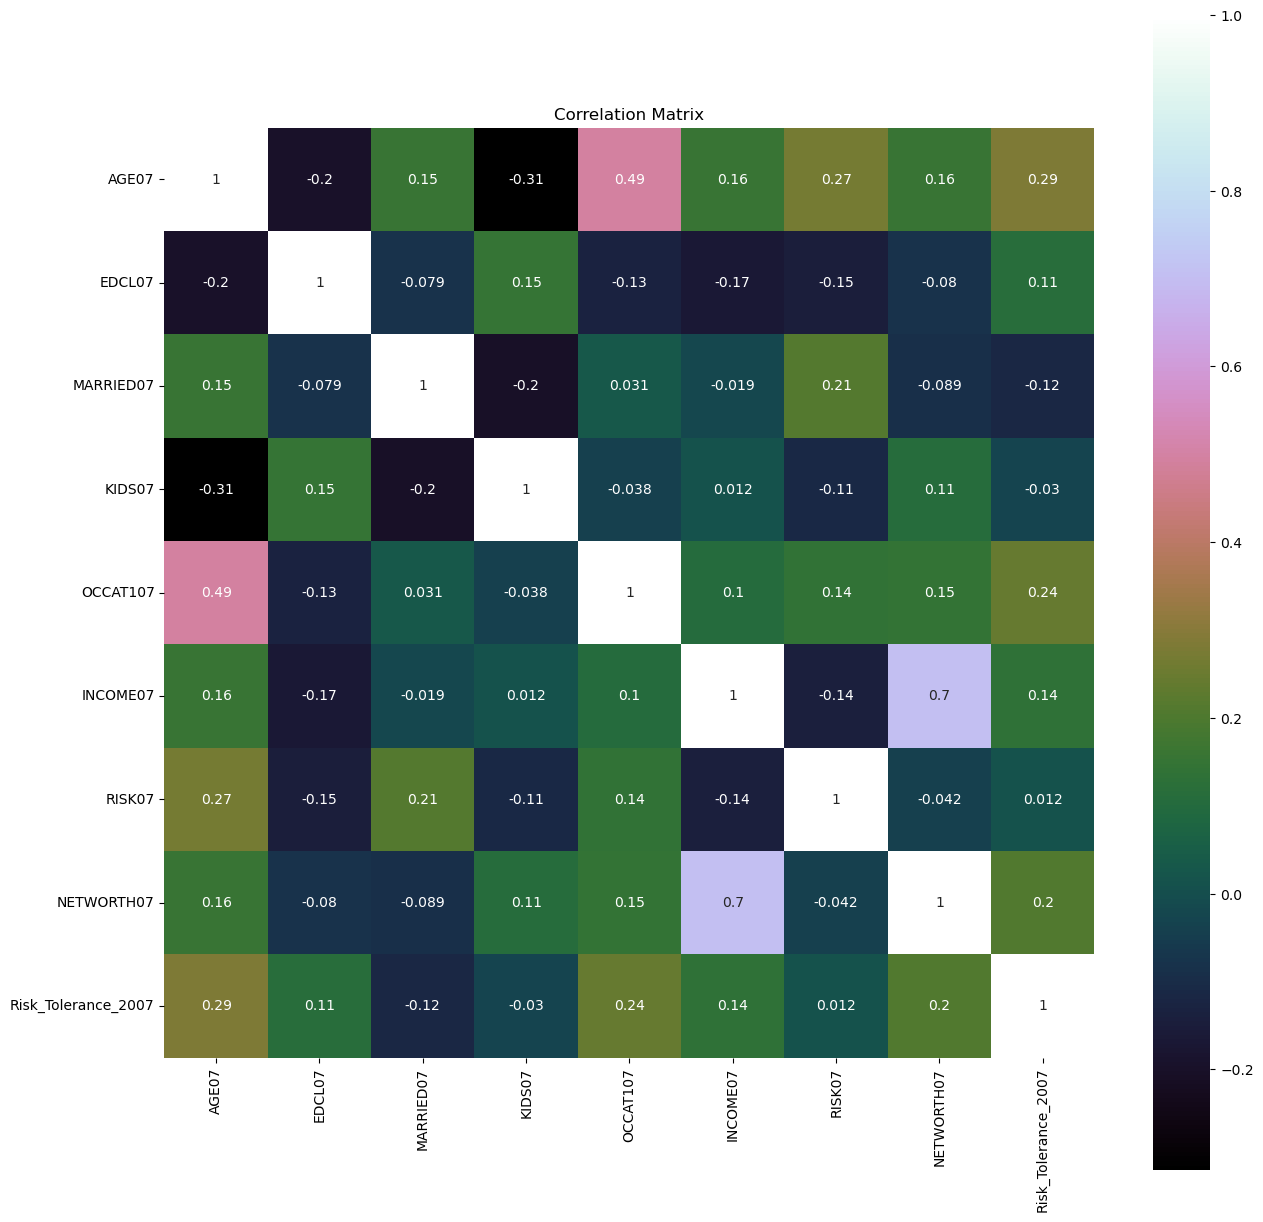

In [83]:

plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

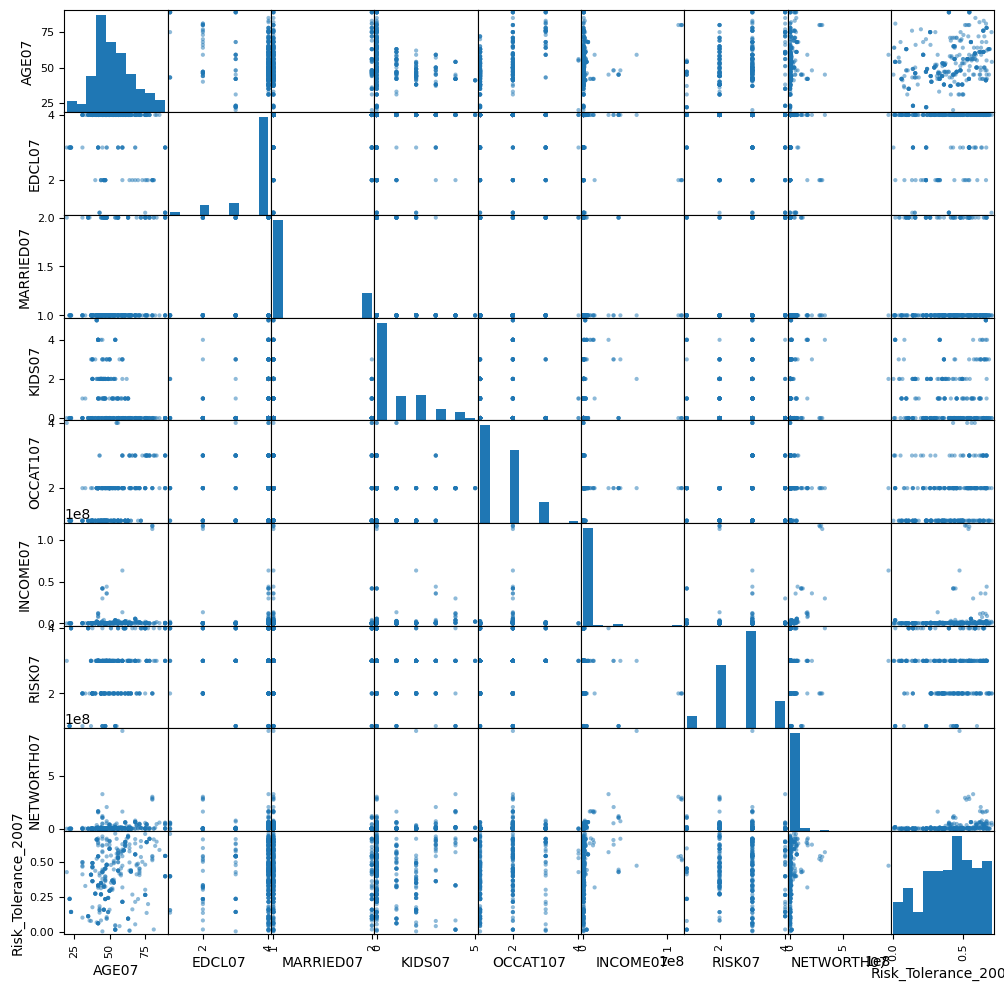

In [84]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(15,15))
scatter_matrix(selected_dataset,figsize=(12,12))
plt.show()

In [85]:
from pickle import dump
from pickle import load

dump(selected_dataset,open('build_lab2a.sav','wb'))